# BoomBikes Bike Sharing Assignment 

## Problem Statement
A bike-sharing system provides bikes for short-term use, often for a fee or at no cost, allowing users to borrow bikes from computer-controlled docks by entering payment details. These bikes can be returned to any dock within the same system. BoomBikes, a US bike-sharing provider, has faced revenue declines during the Covid-19 pandemic and seeks a sustainable business plan for post-lockdown recovery. They aim to gauge post-quarantine bike-sharing demand nationwide, preparing to meet these needs effectively and differentiate themselves in the market to drive significant profits once the situation improves.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Our Assignment works on addressing above all, using python. Below are the main steps, we took
1. Data initialization and understanding
2. Data Visualization
3. Data Preparation
4. Building the Linear Model
5. Conclusion


## 1. Data initialization and understanding

### Importing libraries

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Data Initialization

In [264]:
#Reading the csv file
df = pd.read_csv('day.csv')
#viewing the top 5 records
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [265]:
#viewing the bottom 5 records
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [266]:
#view the shape for columns and row size
df.shape

(730, 16)

In [267]:
#looking the dtypes
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [268]:
#looking for df info to get non-null and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [269]:
#getting numeric columns detail data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing redundant columns

In [270]:
#dropping instant column as it's just the record number
df.drop(['instant'], axis =1, inplace=True)

In [271]:
#dropping dteday column as it's recorded in other columns as weekday,mnth and yr
df.drop(['dteday'], axis =1, inplace=True)

In [272]:
#dropping casual and registered columns as it's just the combined count in cnt
df.drop(['casual', 'registered'], axis =1, inplace=True)

In [273]:
#Viewing the dtypes, columns list after dropping above 3 columns
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [274]:
#Viewing top 10 records before changing the columns to categorical
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [275]:
#altering the season,mnth,weekday,weathersit columns to categorical from numerical columns by mapping accordingly
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [276]:
#Viewing bottom 10 records after changing the columns to categorical
df.tail(100)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
630,winter,1,sep,0,sun,0,Clear,21.695847,25.94665,46.7083,14.958286,7907
631,winter,1,sep,0,mon,1,Clear,21.080847,25.12565,49.2917,9.541068,7436
632,winter,1,sep,0,tue,1,Clear,22.550000,27.20895,57.0000,15.833507,7538
633,winter,1,sep,0,wed,1,Clear,26.035000,29.83065,63.0833,16.374800,7733
634,winter,1,sep,0,thu,1,Misty,26.650000,30.39875,69.0833,9.000914,7393
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [277]:
#Viewing the columns info after changing 4 columns to categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 2. Data Visualization

<Figure size 2000x1200 with 0 Axes>

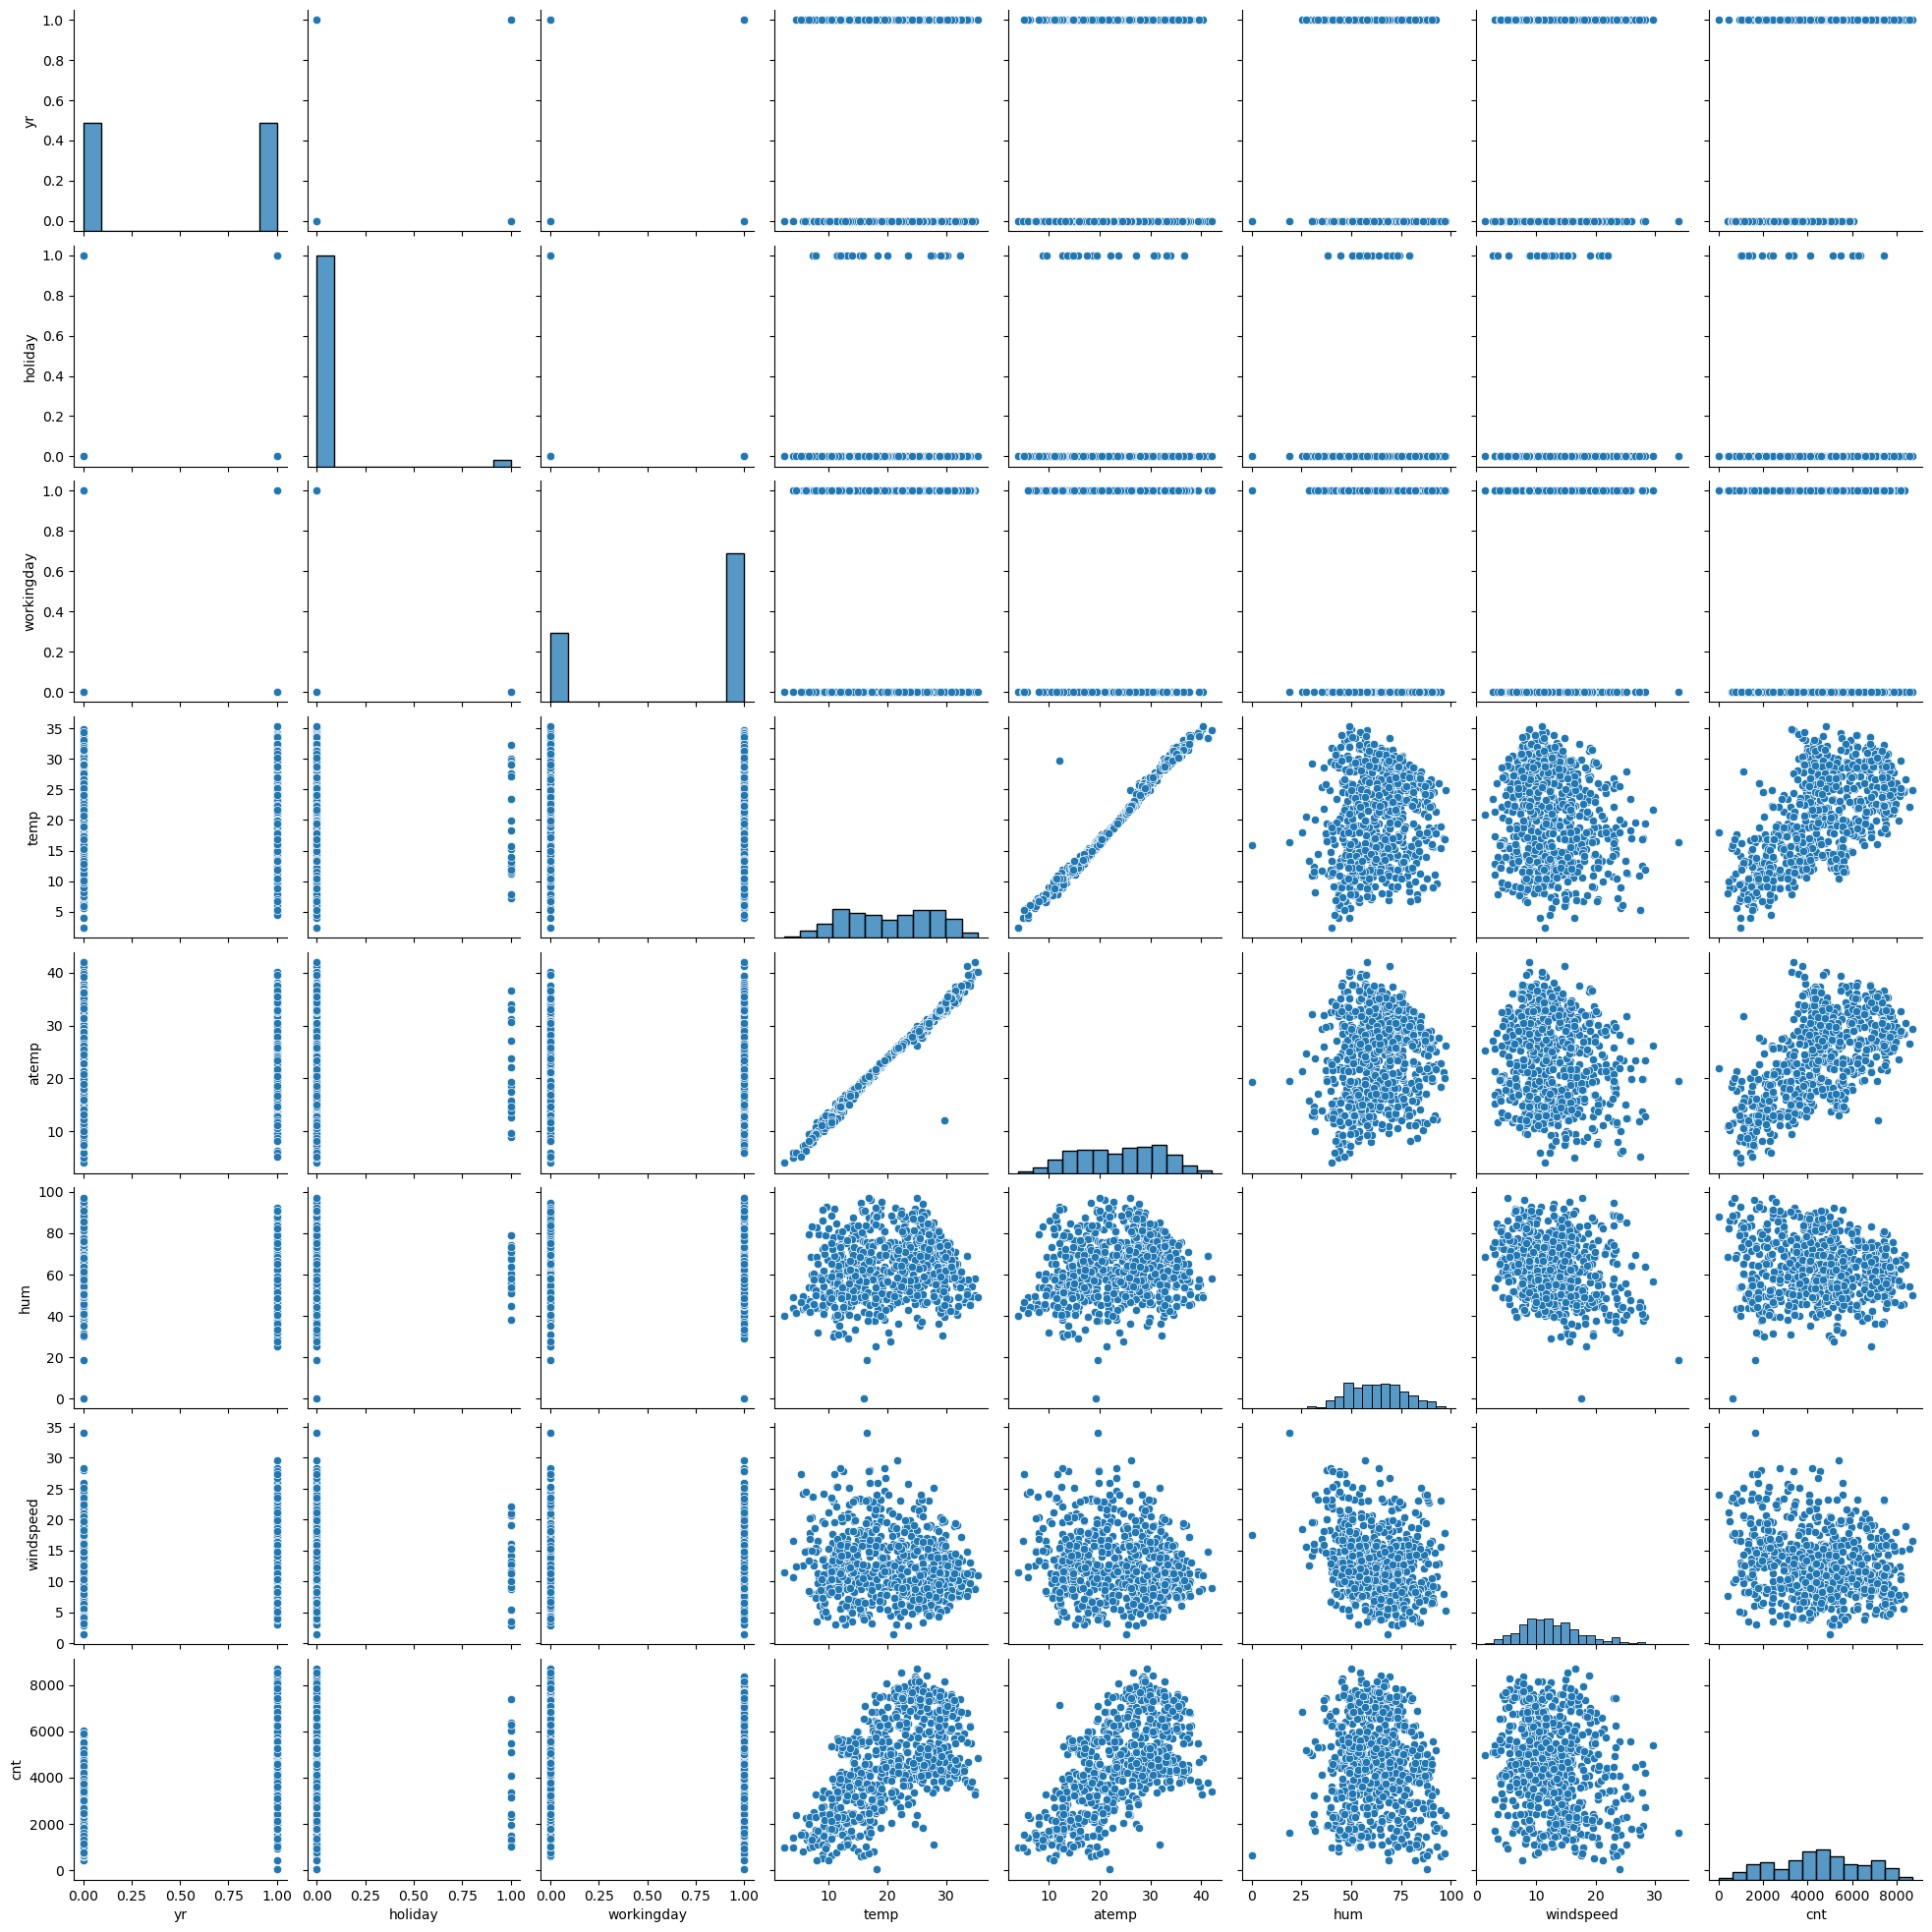

In [278]:
#Visualizing all the columns
plt.figure(figsize=(20,12))
sns.pairplot(df)
plt.show()

In [279]:
#Viewing info again to have the columns for numerical and categorical type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


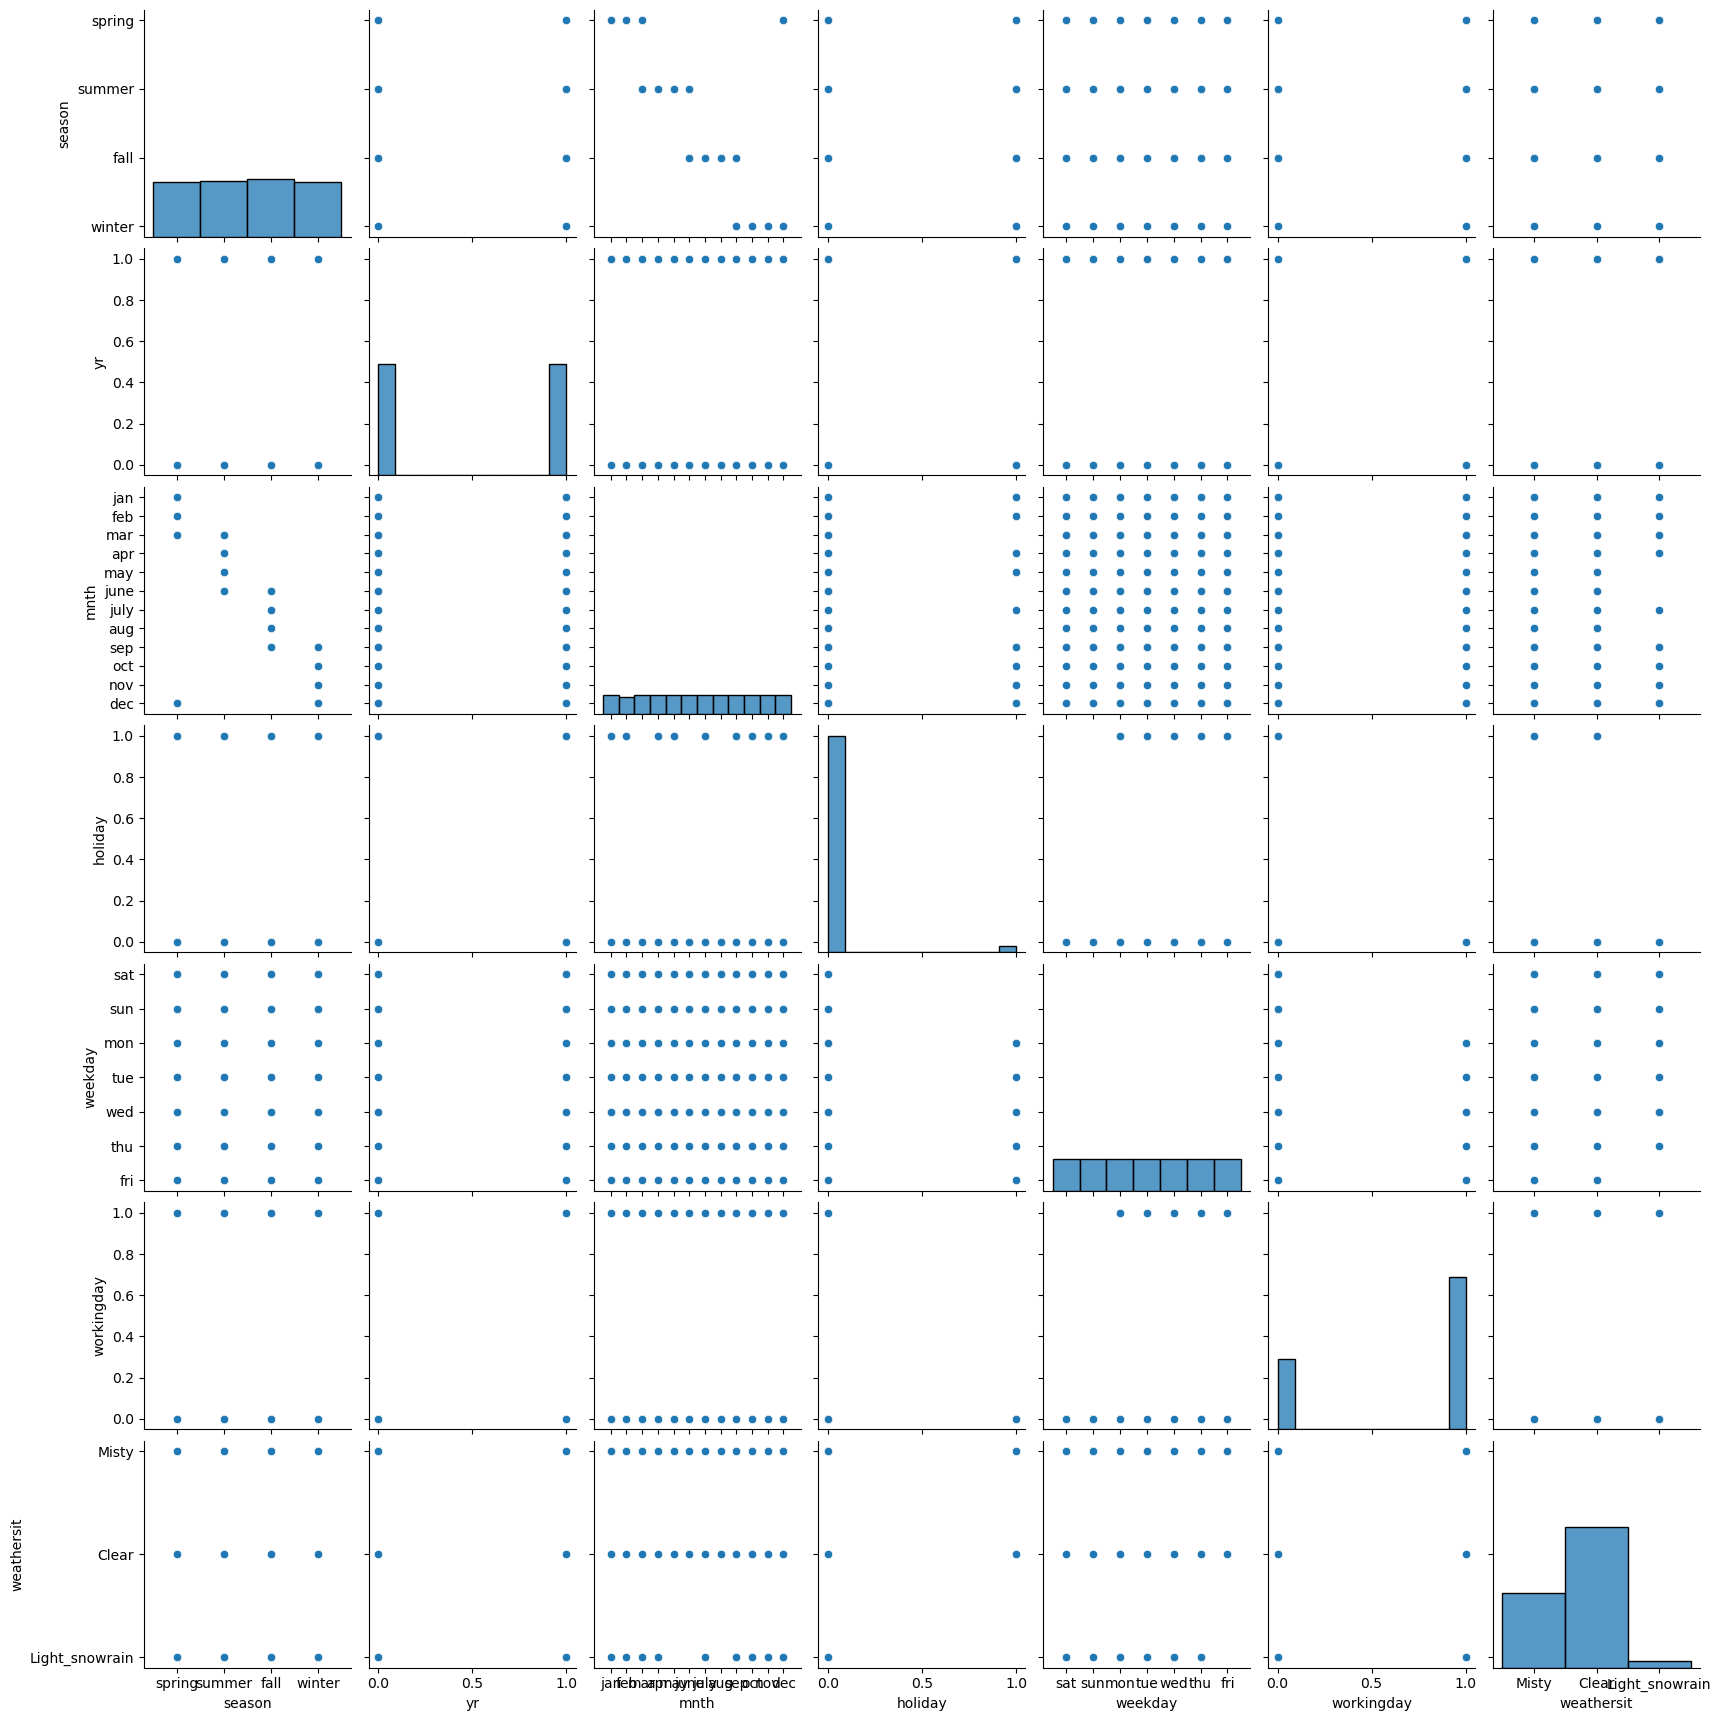

In [280]:
#Visualizing categorical columns
sns.pairplot(data=df,vars=['season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit'])
plt.show()

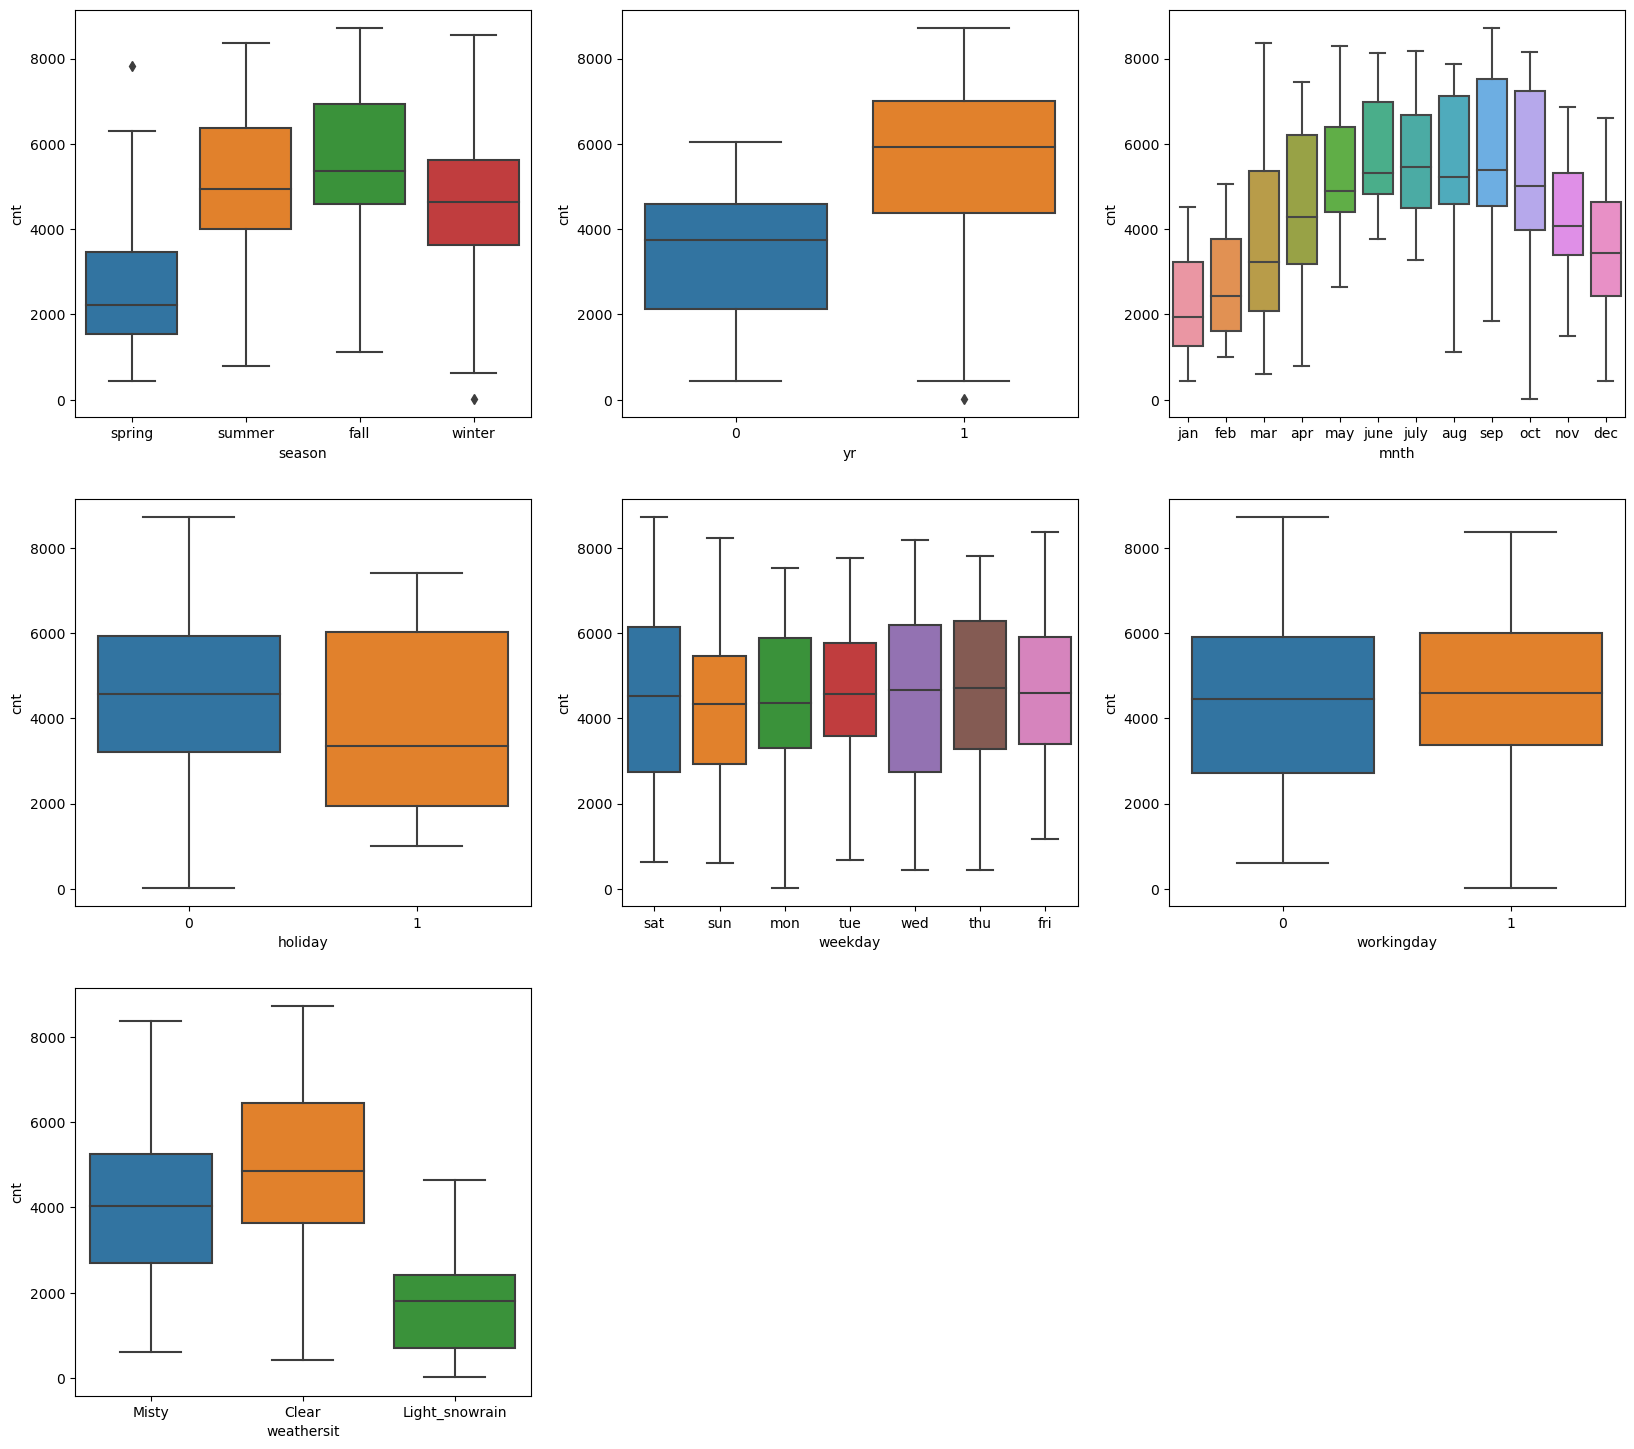

In [281]:
#viewing the categorical columns through Boxplot
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.boxplot(data=df, x='season', y='cnt')
plt.subplot(3,3,2)
sns.boxplot(data=df, x='yr', y='cnt')
plt.subplot(3,3,3)
sns.boxplot(data=df, x='mnth', y='cnt')
plt.subplot(3,3,4)
sns.boxplot(data=df, x='holiday', y='cnt')
plt.subplot(3,3,5)
sns.boxplot(data=df, x='weekday', y='cnt')
plt.subplot(3,3,6)
sns.boxplot(data=df, x='workingday', y='cnt')
plt.subplot(3,3,7)
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.show()

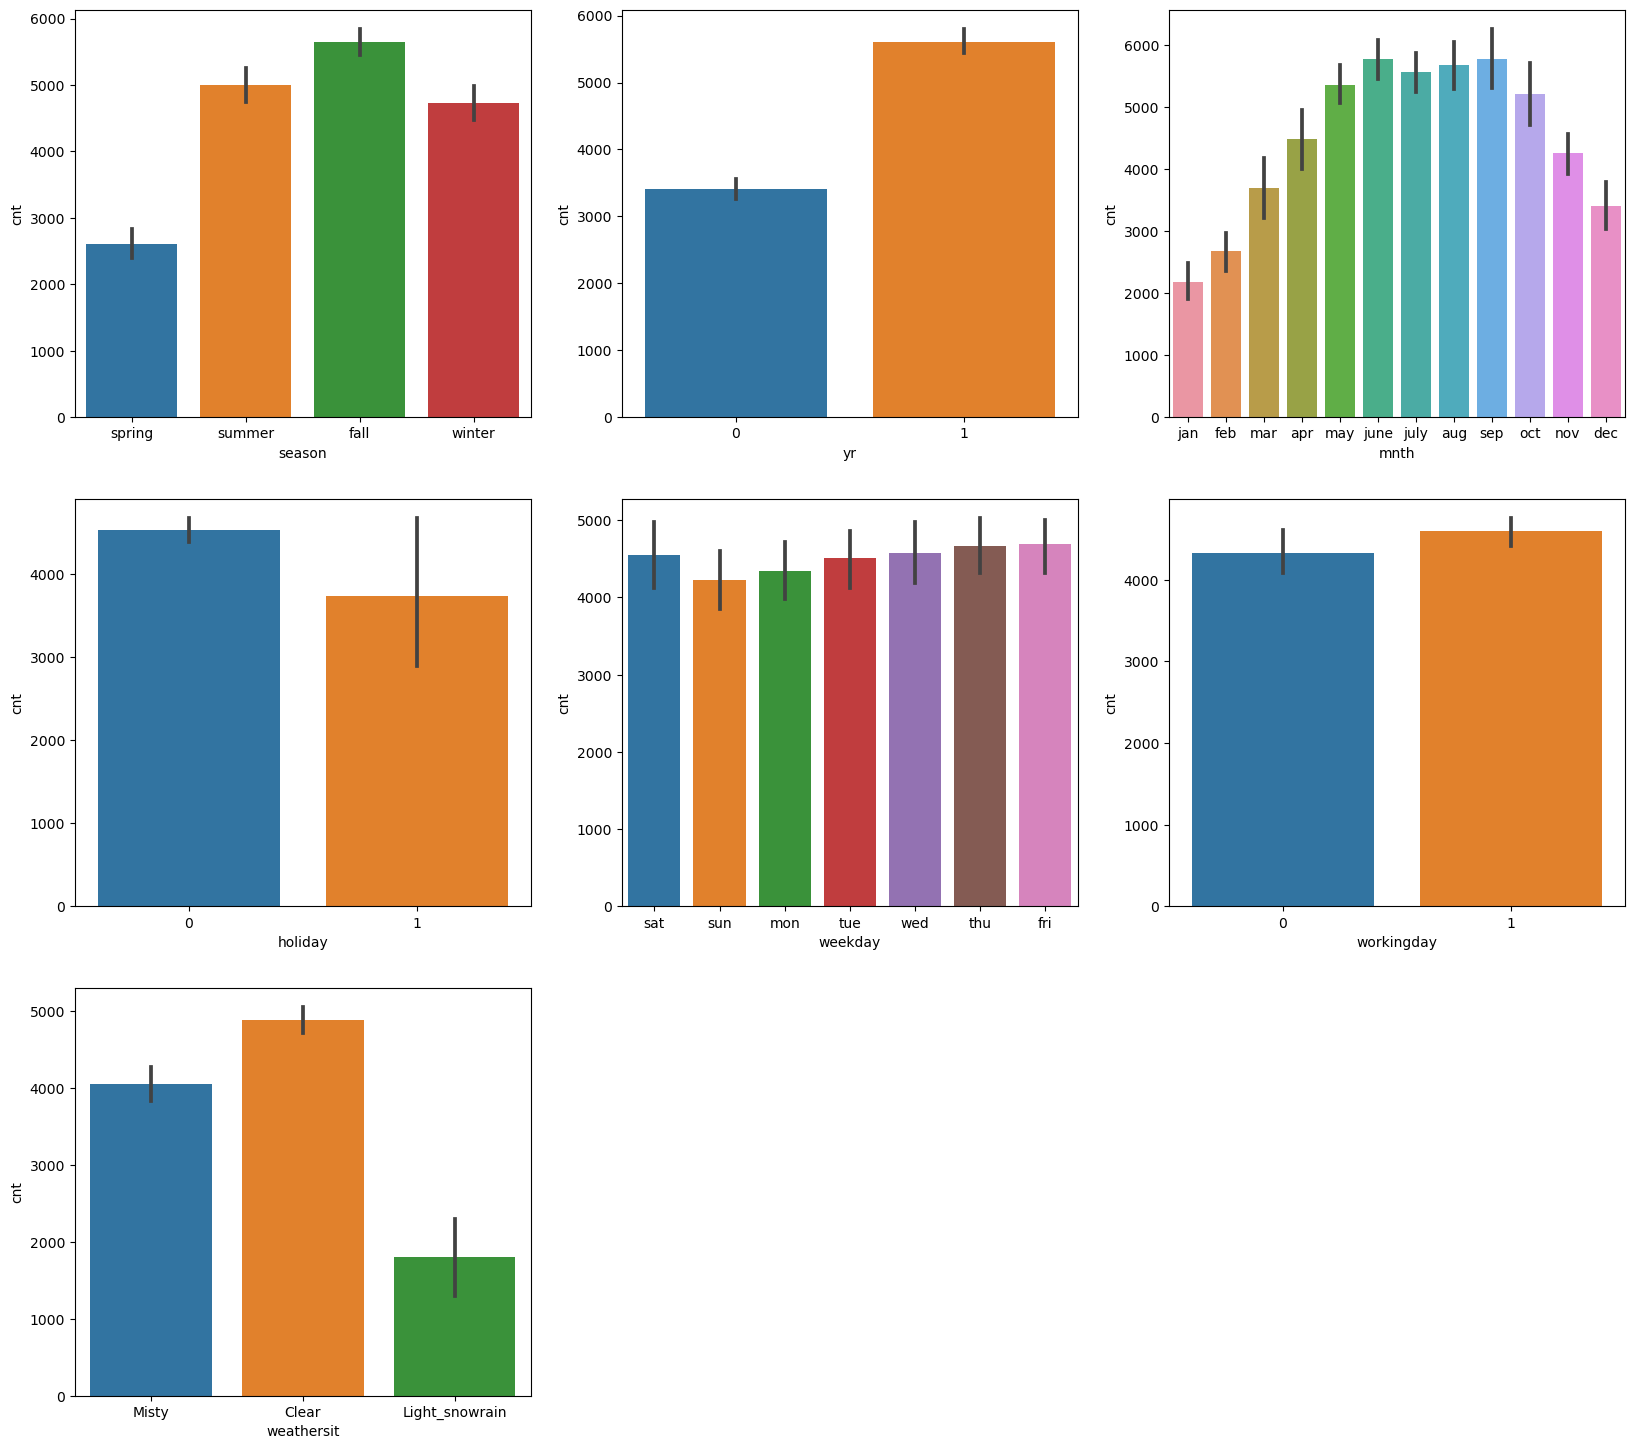

In [282]:
#viewing the categorical columns through Barplot
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.barplot(data=df, x='season', y='cnt')
plt.subplot(3,3,2)
sns.barplot(data=df, x='yr', y='cnt')
plt.subplot(3,3,3)
sns.barplot(data=df, x='mnth', y='cnt')
plt.subplot(3,3,4)
sns.barplot(data=df, x='holiday', y='cnt')
plt.subplot(3,3,5)
sns.barplot(data=df, x='weekday', y='cnt')
plt.subplot(3,3,6)
sns.barplot(data=df, x='workingday', y='cnt')
plt.subplot(3,3,7)
sns.barplot(data=df, x='weathersit', y='cnt')
plt.show()

### _Inference_
1. More people like to rent the bike in Fall & Summer when compared to Spring & winter, might be because of easiness in weather/season
2. Cnt increased in 2019 compared to 2018
3. More people likely to rent the bike from May to Sep.Oct depicting the Fall and Summer
4. More people are likely to rent a bike during clear weather than in misty or snow or rain fall
5. From the boxplot & barplot, cnt values are lower in holidays
6. From the boxplot & barplot, The cnt value increses from Sun to Sat, with high values on Saturday, Friday, and low values on Monday
7. From the boxplot & barplot, there’s very less difference between a working day and not a working day, however we can infer that working day has more cnt than the other

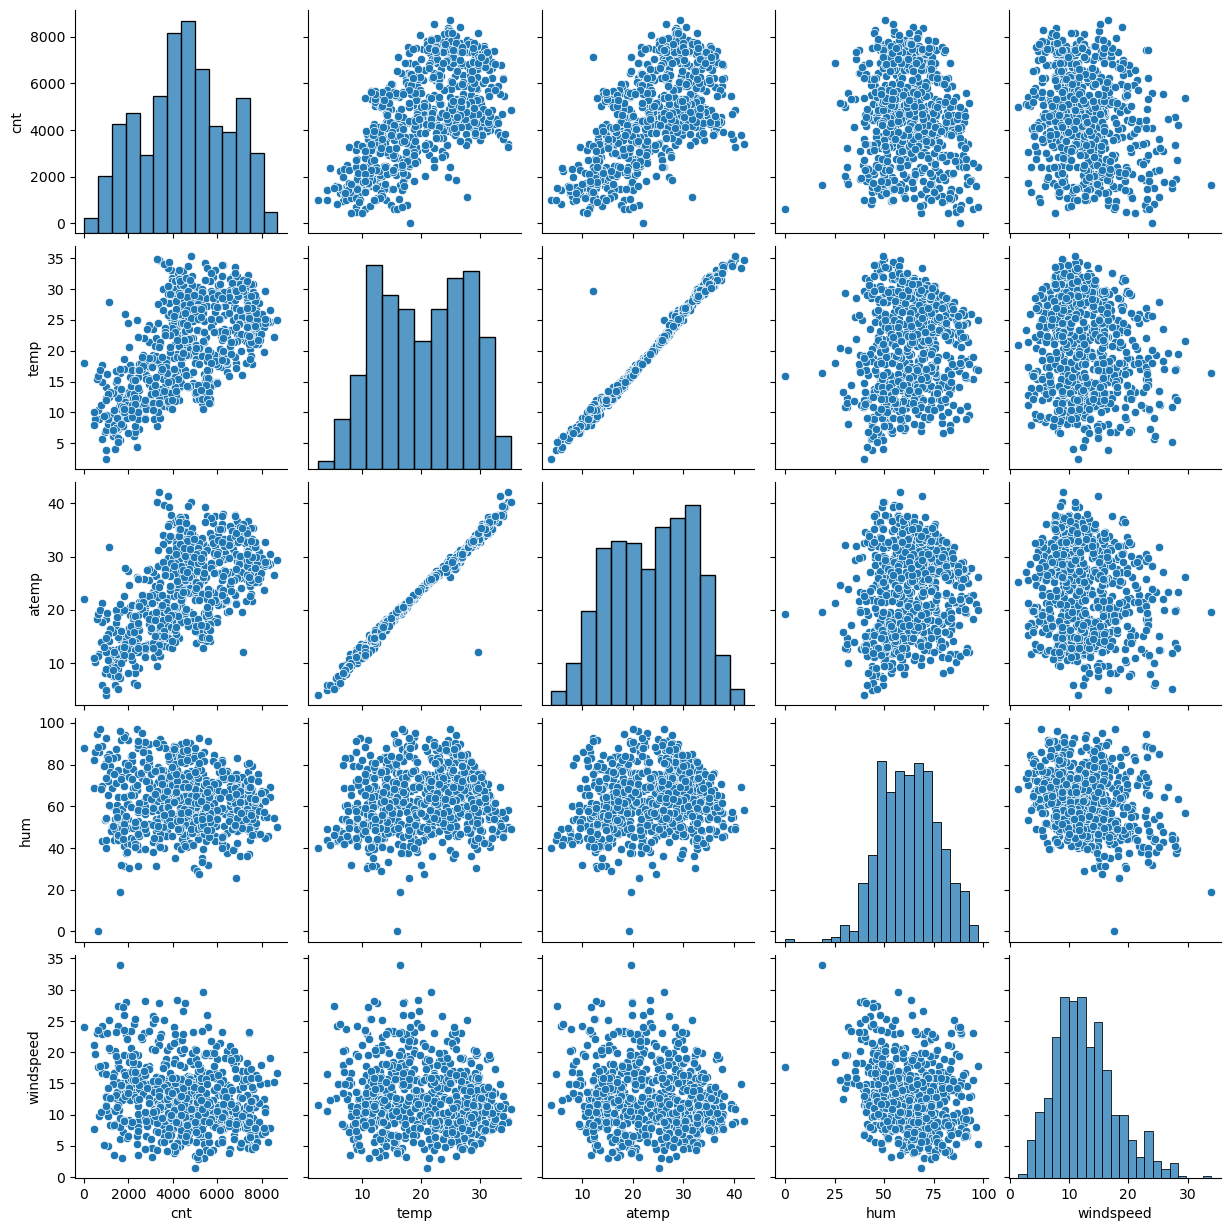

In [283]:
#Visualizing numeric/int/float columns
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [284]:
#Checking correlation between numeric variables
num_variables = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
correlation_matrix = df[num_variables].corr()
print(correlation_matrix)

                cnt      temp     atemp       hum  windspeed
cnt        1.000000  0.627044  0.630685 -0.098543  -0.235132
temp       0.627044  1.000000  0.991696  0.128565  -0.158186
atemp      0.630685  0.991696  1.000000  0.141512  -0.183876
hum       -0.098543  0.128565  0.141512  1.000000  -0.248506
windspeed -0.235132 -0.158186 -0.183876 -0.248506   1.000000


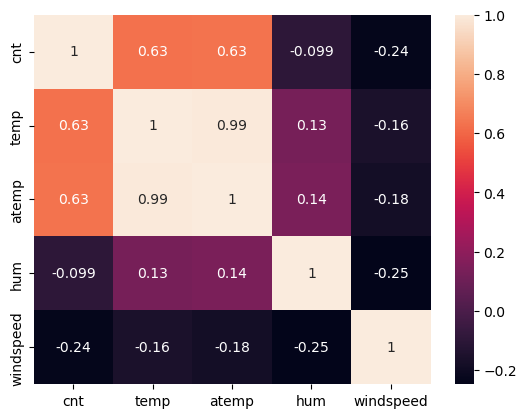

In [285]:
#Viewing the heatmap fpr above created correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### _Inference_
We can see that there's positive and good correlation between Cnt and Temp, Atemp. Also we can see that there's linear relationship between temp and atemp, which causes multi-collinearity, we'll decide which one to choose based on VIF and p-Value.

In [286]:
#Let's check the correlation between all the varaibles in df dataset
co_mx = df.corr()
print(co_mx)

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.002945  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.252948 -0.028764 -0.032703 -0.015662   
workingday -0.002945 -0.252948    1.000000  0.053470  0.052940  0.023202   
temp        0.048789 -0.028764    0.053470  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.052940  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.023202  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.018666 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764    0.062542  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.018666  0.062542  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000  


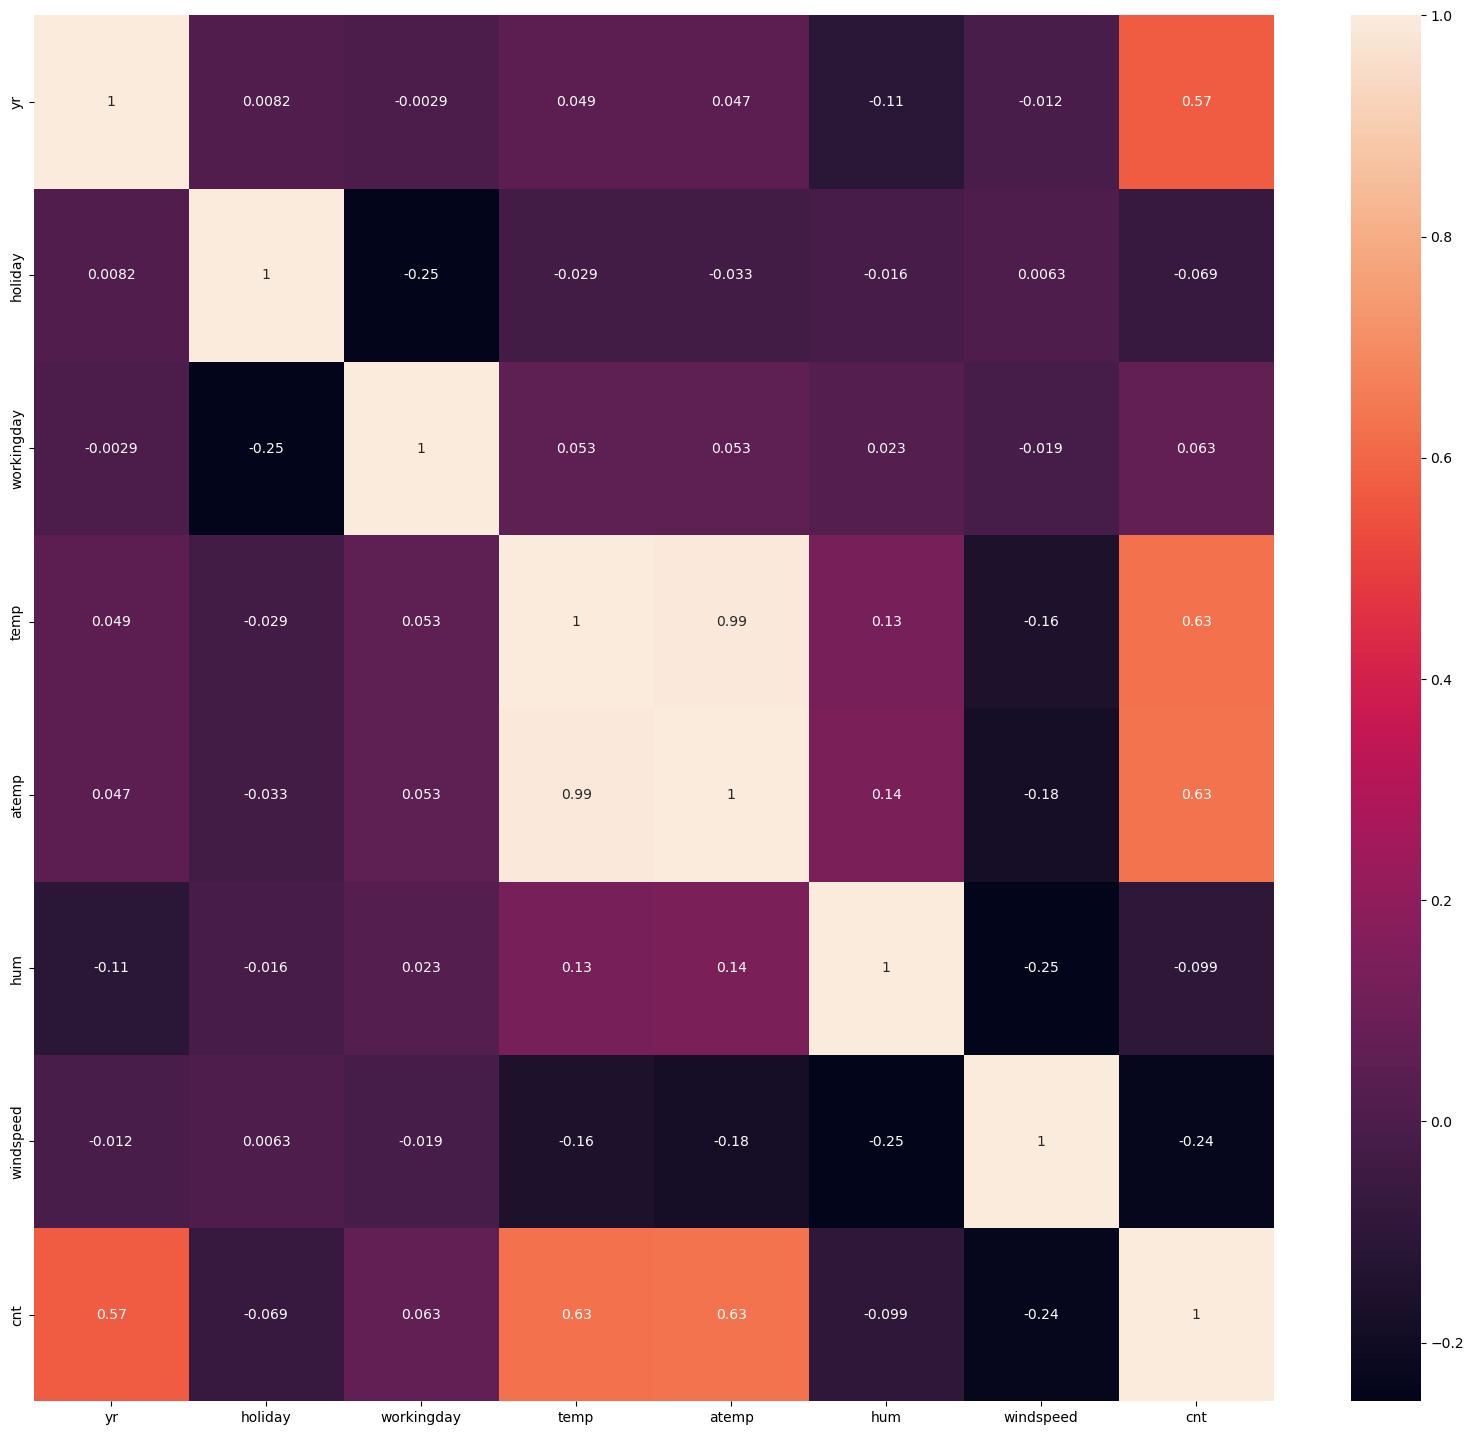

In [287]:
#Viewing the heatmap for all varaibles in df
plt.figure(figsize=(20,18))
sns.heatmap(co_mx, annot= True)
plt.show()

### _Inference_
cnt has positive correlation with yr, temp, atemp

## 3. Data Preparation

In [288]:
#Creating dummy variable for mnth, weekday, weathersit, season variable. We're dropping the first dummy for each
dummy_df = pd.get_dummies(df[['mnth', 'weekday', 'weathersit', 'season']], drop_first=True)
dummy_df.head()

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [289]:
#Viewing the dummy_df variables
dummy_df.columns

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [290]:
#Concatenating the df and dummy_df (original df, and dummy variables) into a new df bs_df
bs_df = pd.concat([df,dummy_df], axis=1)

In [291]:
#viewing the new DF info
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     730 non-null    object 
 1   yr                         730 non-null    int64  
 2   mnth                       730 non-null    object 
 3   holiday                    730 non-null    int64  
 4   weekday                    730 non-null    object 
 5   workingday                 730 non-null    int64  
 6   weathersit                 730 non-null    object 
 7   temp                       730 non-null    float64
 8   atemp                      730 non-null    float64
 9   hum                        730 non-null    float64
 10  windspeed                  730 non-null    float64
 11  cnt                        730 non-null    int64  
 12  mnth_aug                   730 non-null    uint8  
 13  mnth_dec                   730 non-null    uint8  

In [292]:
#Viewing the top 5 records for bs_df
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [293]:
#Dropping the three variable for which the dummy were created
bs_df.drop(['mnth', 'weekday', 'weathersit', 'season'], axis=1, inplace=True)

In [294]:
#Viewing the df info after dropping the 4 variables
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   mnth_aug                   730 non-null    uint8  
 9   mnth_dec                   730 non-null    uint8  
 10  mnth_feb                   730 non-null    uint8  
 11  mnth_jan                   730 non-null    uint8  
 12  mnth_july                  730 non-null    uint8  
 13  mnth_june                  730 non-null    uint8  

### Splitting the data into Train and Test Sets

### Splitting

In [295]:
#Splitting the data into Train & Test datasets
df_train, df_test = train_test_split(bs_df, train_size = 0.7, random_state = 100)

In [296]:
#Viewing the original DF, Train DF, and Test DF shape
print(bs_df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(220, 30)


### Scaling the Train dataset

In [297]:
#Initialize the MinMaxScaler to Scaler
scaler = MinMaxScaler()

In [298]:
#Checking the data before scaling
df_train[num_variables]

,cnt,temp,atemp,hum,windspeed
576,7216,29.246653,33.14480,70.4167,11.083475
426,4066,16.980847,20.67460,62.1250,10.792293
728,1796,10.489153,11.58500,48.3333,23.500518
482,4220,15.443347,18.87520,48.9583,8.708325
111,1683,13.803347,16.09770,72.9583,14.707907
...,...,...,...,...,...
578,7261,30.852500,35.35440,65.9583,8.666718
53,1917,9.091299,12.28585,42.3043,6.305571
350,2739,10.591653,12.46855,56.0833,16.292189
79,2077,17.647835,20.48675,73.7391,19.348461


In [299]:
#scaling the Train Set
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [300]:
#Checking the data After scaling
df_train[num_variables]

,cnt,temp,atemp,hum,windspeed
576,0.827658,0.815169,0.766351,0.725633,0.264686
426,0.465255,0.442393,0.438975,0.640189,0.255342
728,0.204096,0.245101,0.200348,0.498067,0.663106
482,0.482973,0.395666,0.391735,0.504508,0.188475
111,0.191095,0.345824,0.318819,0.751824,0.380981
...,...,...,...,...,...
578,0.832835,0.863973,0.824359,0.679690,0.187140
53,0.218017,0.202618,0.218747,0.435939,0.111379
350,0.312586,0.248216,0.223544,0.577930,0.431816
79,0.236424,0.462664,0.434043,0.759870,0.529881


In [301]:
#Let's check the correlation between all the varaibles in df_train dataset
co_mxt = df_train.corr()
print(co_mx)

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.002945  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.252948 -0.028764 -0.032703 -0.015662   
workingday -0.002945 -0.252948    1.000000  0.053470  0.052940  0.023202   
temp        0.048789 -0.028764    0.053470  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.052940  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.023202  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.018666 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764    0.062542  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.018666  0.062542  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000  


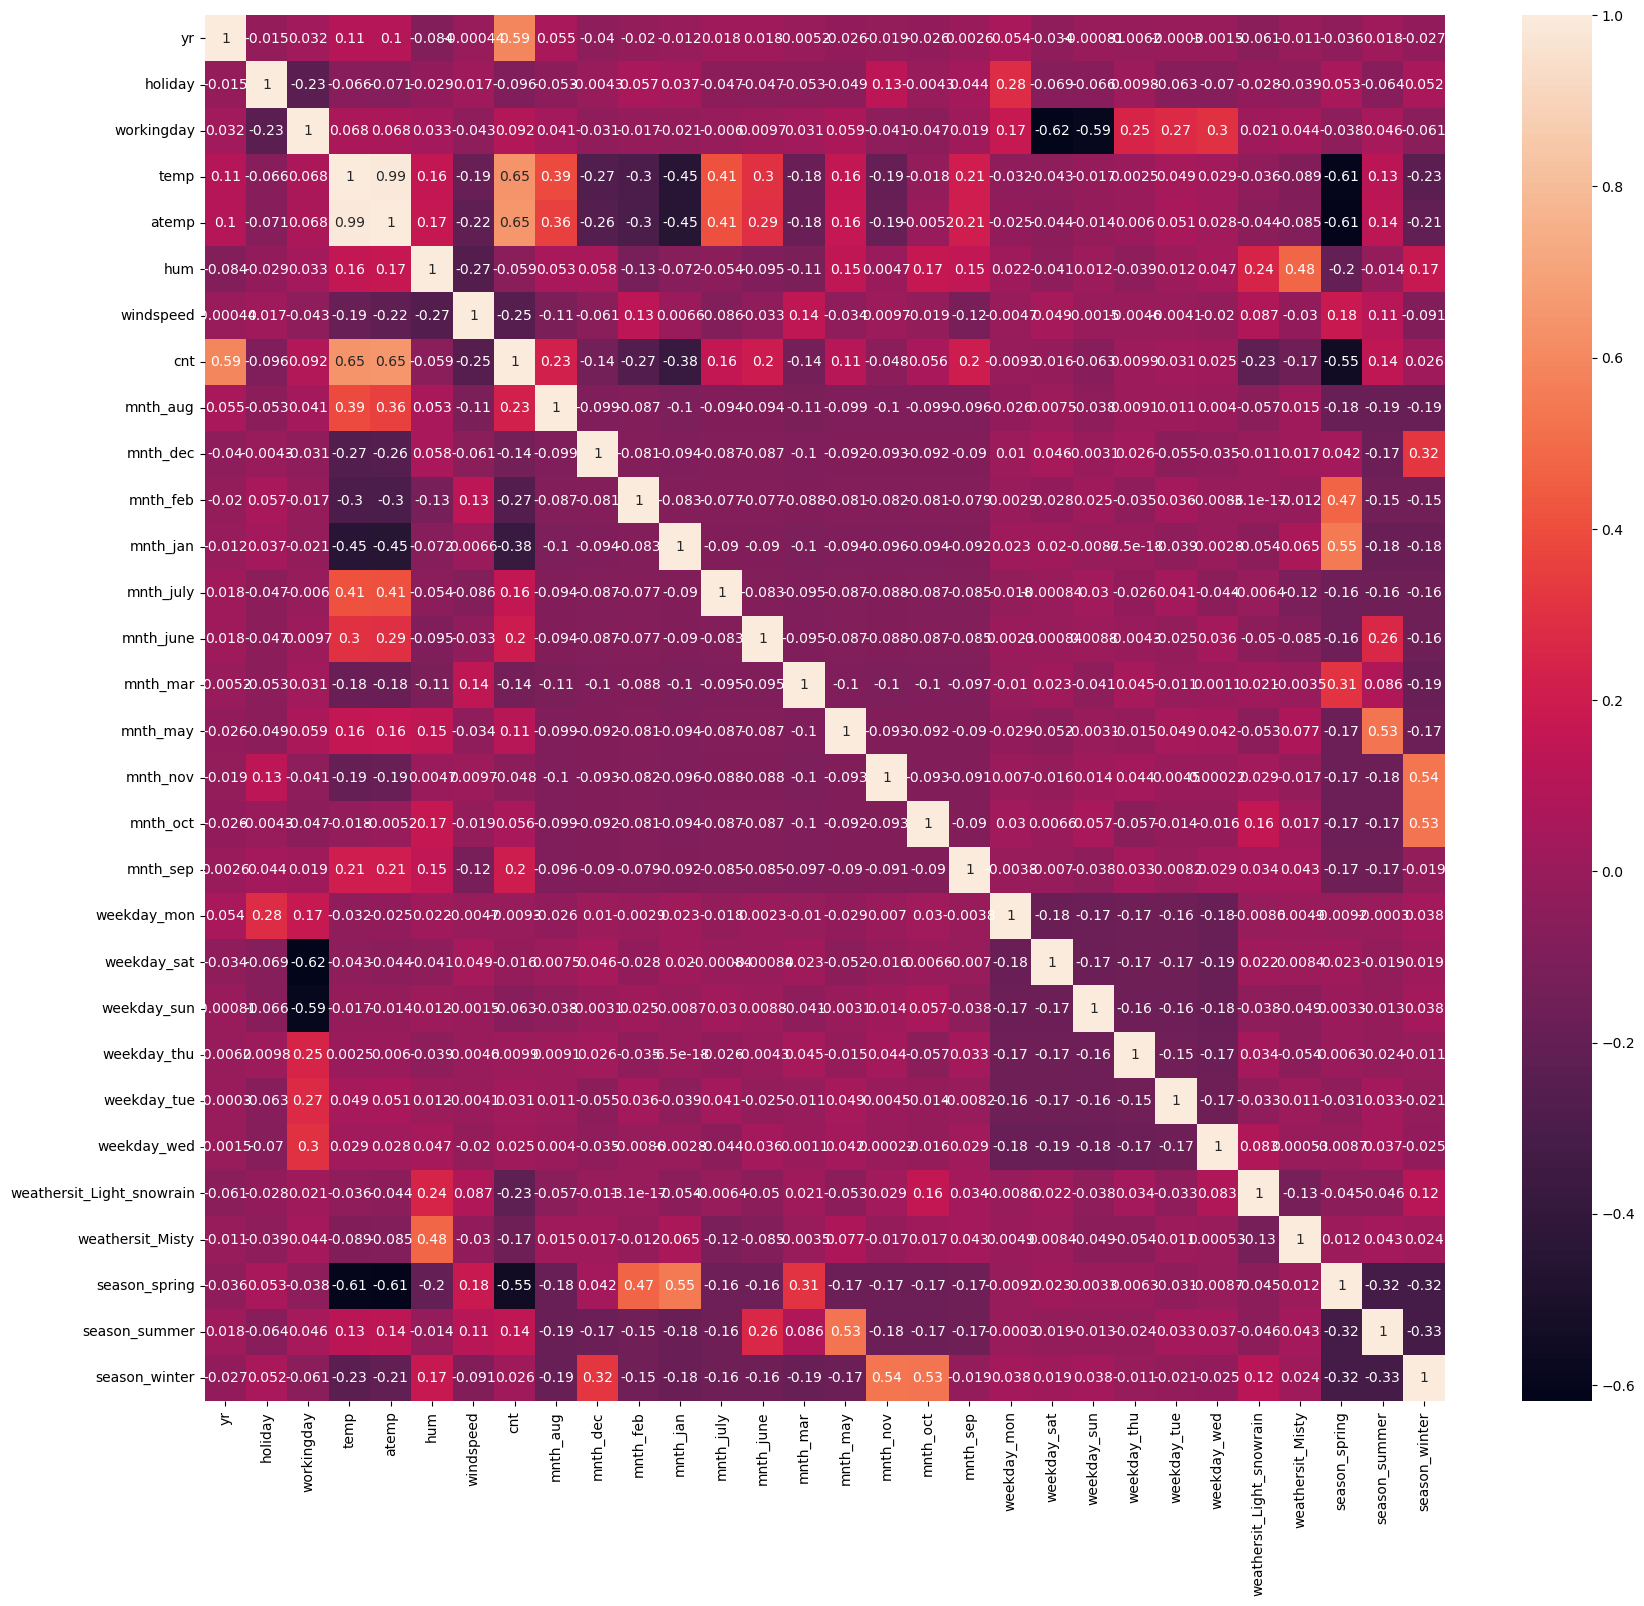

In [302]:
#Viewing the heatmap for above created correlation matrix
plt.figure(figsize=(20,18))
sns.heatmap(co_mxt, annot= True)
plt.show()

### _Inference_
1. Positive Correlations
    1. temp and atemp have a strong positive correlation of about 0.99, indicating they are highly correlated. This is expected as they represent temperature and feel-like temperature, which are inherently related.
    2. cnt (bike rentals) has a moderate positive correlation with temp (0.63) and atemp (0.63). This indicates that higher temperatures tend to correlate with increased bike rentals.
2. Negative Correlations
    1. hum (humidity) has a slight negative correlation with bike rentals (cnt) of around -0.10. Higher humidity seems to be weakly associated with fewer bike rentals.
    2. windspeed has a moderate negative correlation with cnt (-0.24), suggesting that higher windspeeds might be associated with fewer bike rentals. 

In [303]:
print(co_mxt.cnt.sort_values)

<bound method Series.sort_values of yr                           0.591433
holiday                     -0.095948
workingday                   0.092019
temp                         0.645048
atemp                        0.647944
hum                         -0.058793
windspeed                   -0.253038
cnt                          1.000000
mnth_aug                     0.227578
mnth_dec                    -0.143546
mnth_feb                    -0.270351
mnth_jan                    -0.378296
mnth_july                    0.158087
mnth_june                    0.195411
mnth_mar                    -0.137465
mnth_may                     0.113276
mnth_nov                    -0.048002
mnth_oct                     0.055558
mnth_sep                     0.201639
weekday_mon                 -0.009333
weekday_sat                 -0.015998
weekday_sun                 -0.063214
weekday_thu                  0.009928
weekday_tue                  0.030528
weekday_wed                  0.025468
weathersit_Lig

### _Inference_
1. Positive Correlations
    1. Positive correlation values (close to 1) suggest a positive linear relationship between the categorical variable and 'cnt'.
    2. For example, 'mnth_aug', 'mnth_july', 'mnth_june', 'mnth_may', 'mnth_oct', 'mnth_sep', 'weekday_tue', 'weekday_wed', 'season_summer', and 'season_winter' all have positive correlations with 'cnt'.
2. Negative Correlations
    1. Negative correlation values (close to -1) suggest a negative linear relationship.
    2. For example, 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_mar', 'mnth_nov', 'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty', and 'season_spring' all have negative correlations with 'cnt'.


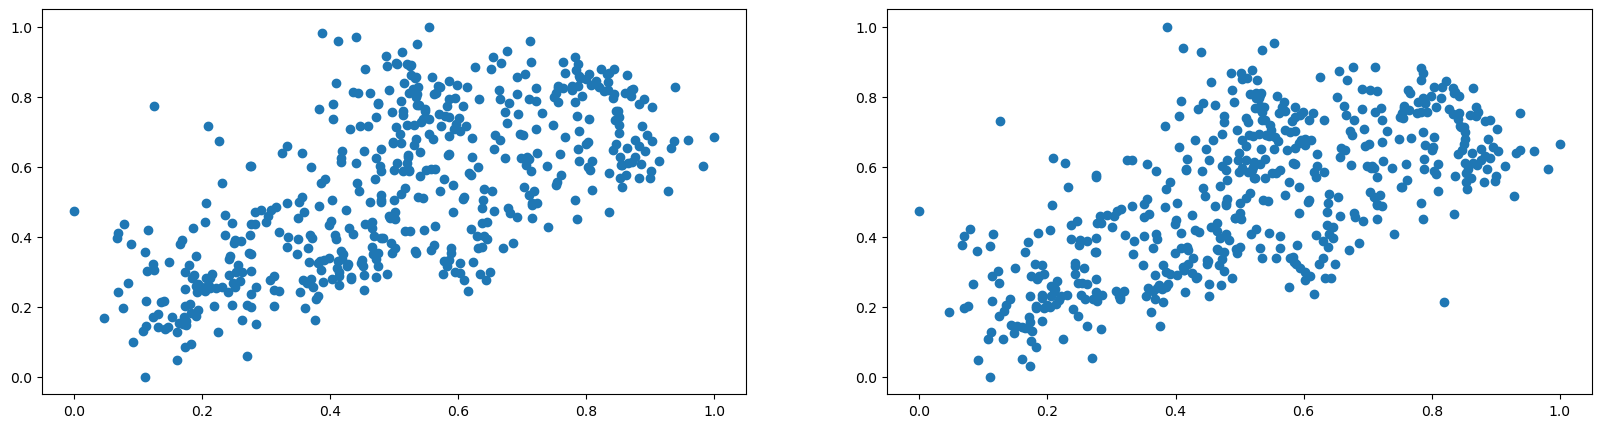

In [304]:
#Let's see the relation between cnt, and temp, atemp among the many we consider
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(df_train['cnt'], df_train['temp'])
plt.subplot(1,2,2)
plt.scatter(df_train['cnt'], df_train['atemp'])
plt.show()

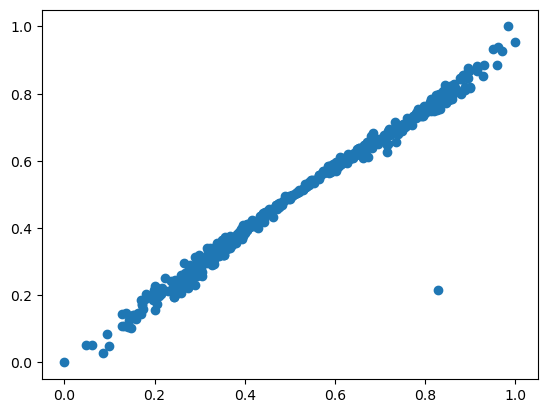

In [305]:
#Let's see the relation between temp, atemp
plt.scatter(df_train['temp'], df_train['atemp'])
plt.show()

### _Inference_
There's linear relation between temp and atemp, so we might have to consider only one among both to avoid multi-collinearity

## 4. Building the Linear Model

In [306]:
#Build the x and y sets for the df_train
y_train = df_train.pop('cnt')
X_train = df_train

In [307]:
#viewing the top 5 records for y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [308]:
#viewing the top 5 records for X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Using RFE to build the initial model

In [309]:
# Initializing and fitting a Linear Regression model (lm) to the training data (X_train, y_train),
# then using Recursive Feature Elimination (RFE) with lm as the estimator to select 15 best features from X_train.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [310]:
#Listing all the columns and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 10),
 ('mnth_june', False, 6),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 15),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', False, 14),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [311]:
#Listing the columns which are selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_aug',
       'mnth_jan', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_summer',
       'season_winter'],
      dtype='object')

In [312]:
#Listing all the columns which are not selected through RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_dec', 'mnth_feb', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring'],
      dtype='object')

### _Inference_
We can see that atemp is removed, so collinearity is avoided for temp and atemp

In [313]:
#Creating the dataframe with selected columns from RFE
X_train_rfe = X_train[col]
#Viewing the X_train_rfe
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_aug,mnth_jan,mnth_sep,weekday_sat,weekday_sun,weathersit_Light_snowrain,weathersit_Misty,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,1,0


In [314]:
#Defining Function for VIF
def VIF_Calc(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [315]:
#Linear Model 1
#Let's build First Linear Model
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#View the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.01e-191
Time:                        16:14:18   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Inference: holiday has high p value

In [316]:
#Calculate the VIF values for X_train_rfe
VIF_Calc(X_train_rfe)

,Features,VIF
2,workingday,34.00
9,weekday_sat,8.38
10,weekday_sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
14,season_winter,1.58
12,weathersit_Misty,1.56
7,mnth_jan,1.55
13,season_summer,1.48


Inference: workingday has high VIF value

In [317]:
#dropping workingday as it has high VIF value
X_train_new = X_train_rfe.drop(['workingday'], axis =1)

In [318]:
#Linear Model 2
#Creating new Linear Model with newly created df
X_train_lm2 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.01e-191
Time:                        16:14:50   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [319]:
#Calculate the VIF values for X_train_new
VIF_Calc(X_train_new)

,Features,VIF
3,hum,18.41
2,temp,11.43
4,windspeed,3.68
11,weathersit_Misty,2.17
13,season_winter,2.05
0,yr,2.04
12,season_summer,1.96
5,mnth_aug,1.60
6,mnth_jan,1.55
7,mnth_sep,1.32


In [320]:
#Creating a new dataframe by dropping weekday_sat as it has high p value
X_train_new = X_train_new.drop(['weekday_sat'], axis =1)

In [321]:
#Linear Model 3
#Creating new Linear Model with newly created df
X_train_lm3 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.35e-193
Time:                        16:15:08   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -948.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [322]:
#Calculate the VIF values for X_train_new
VIF_Calc(X_train_new)

,Features,VIF
3,hum,18.36
2,temp,11.43
4,windspeed,3.63
10,weathersit_Misty,2.17
0,yr,2.04
12,season_winter,2.04
11,season_summer,1.96
5,mnth_aug,1.60
6,mnth_jan,1.55
7,mnth_sep,1.32


In [323]:
#Creating a new dataframe by dropping hum, as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis =1)

In [324]:
#Linear Model 4
#Creating new Linear Model with newly created df
X_train_lm4 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.83e-190
Time:                        16:15:16   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [325]:
#Calculate the VIF values for X_train_new
VIF_Calc(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,3.36
0,yr,2.04
10,season_summer,1.89
4,mnth_aug,1.60
11,season_winter,1.56
9,weathersit_Misty,1.54
6,mnth_sep,1.32
5,mnth_jan,1.23
7,weekday_sun,1.17


In [326]:
#let's drop mnth_jan and create a new df, as high p value among the present
X_train_new = X_train_new.drop(['mnth_jan'], axis =1)

In [327]:
#Linear Model 5
#Creating new Linear Model with newly created df
X_train_lm5 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.46e-190
Time:                        16:16:01   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [328]:
#Calculate the VIF values for X_train_new
VIF_Calc(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
9,season_summer,1.82
4,mnth_aug,1.59
8,weathersit_Misty,1.49
10,season_winter,1.49
5,mnth_sep,1.31
6,weekday_sun,1.17
7,weathersit_Light_snowrain,1.08


In [329]:
#let's drop mnth_aug and create a new df, as high p value among the present
X_train_new1 = X_train_new.drop(['mnth_aug'], axis =1)

In [330]:
#Linear Model 6
#Creating new Linear Model with newly created df
X_train_lm6 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.34e-189
Time:                        16:16:21   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [333]:
#Calculate the VIF values for X_train_new
VIF_Calc(X_train_new1)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,season_summer,1.57
7,weathersit_Misty,1.48
9,season_winter,1.39
4,mnth_sep,1.21
5,weekday_sun,1.17
6,weathersit_Light_snowrain,1.08
1,holiday,1.04


### We can see that all the variables have very low VIF (<5) and p values are also significant, so Linear Model 6 is our Best Linear Model built so far

In [334]:
#Viewing the co-efficients of the predictor variables in our LR model
lm.params

const                        0.134431
yr                           0.232752
holiday                     -0.106683
temp                         0.547114
windspeed                   -0.153073
mnth_sep                     0.099353
weekday_sun                 -0.049842
weathersit_Light_snowrain   -0.288321
weathersit_Misty            -0.080555
season_summer                0.087801
season_winter                0.131138
dtype: float64

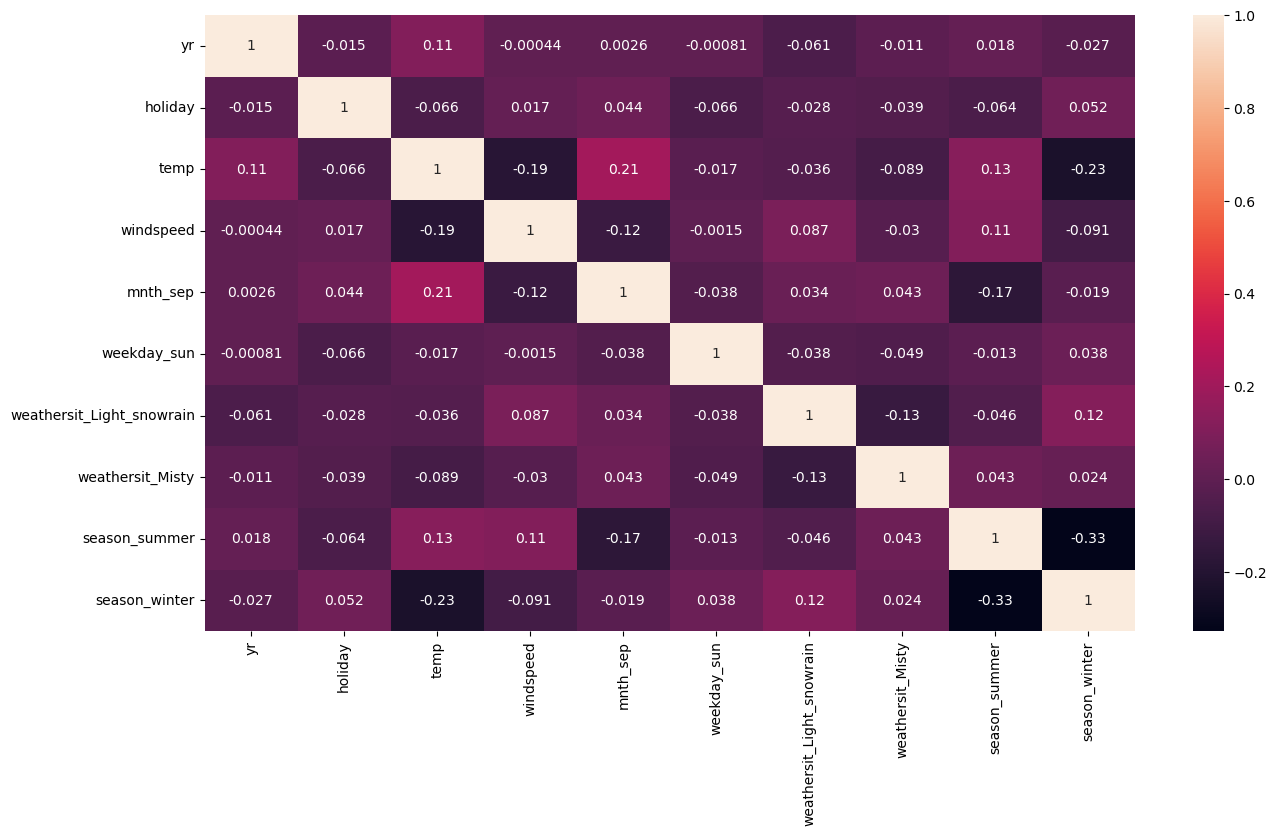

In [335]:
#Viewing the heatmap for the predictor variables in LR model
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new1.corr(),annot = True)
plt.show()

In [336]:
#predicting the train df's cnt
y_train_cnt = lm.predict(X_train_lm6)


### Model Evaluation

/Users/srinivasareddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


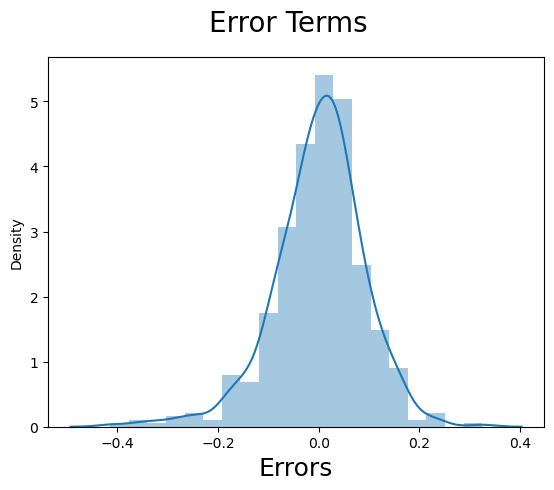

In [337]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### _Inference_
We can see that the assumption is satisfied, that is Error terms are normally distributed with mean as 0

In [338]:
#Calculating the r2 score for the Train set
r2_score(y_train,y_train_cnt)


0.836328851648054

In [339]:
#Listing the numeric variables
num_variables

['cnt', 'temp', 'atemp', 'hum', 'windspeed']

In [340]:
#Scaling the Test set
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [341]:
#Creating the X and y sets for the Test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [342]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [343]:
#Predicting the outcome cnt for the Test set
y_pred = lm.predict(X_test_new)

In [344]:
#Calculating the r2 score for the Test set
r2_score(y_test,y_pred)


0.7965077591496226

### Model Evaluation

/Users/srinivasareddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


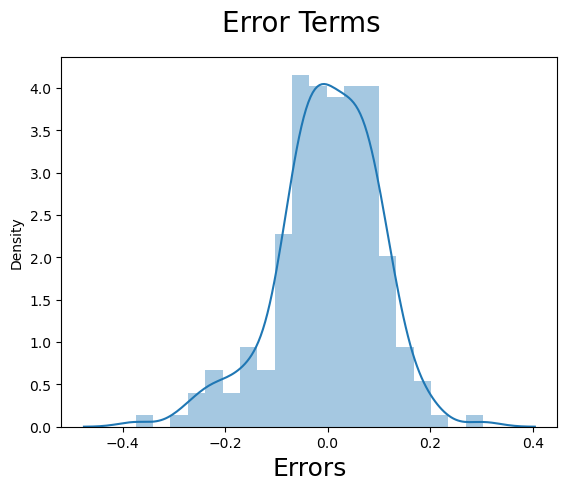

In [345]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### We can see that error terms are normally distributed with mean as 0 for the Test set too

Text(0, 0.5, 'y_pred')

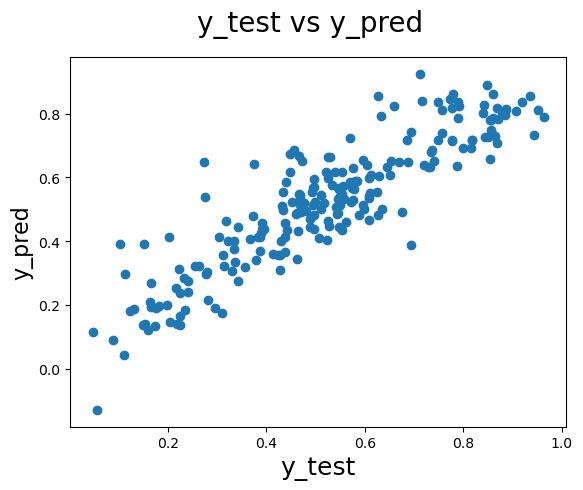

In [346]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

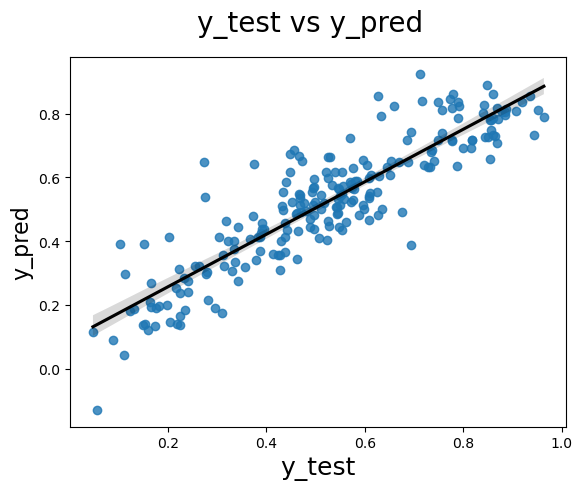

In [348]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred, line_kws={"color":'black'})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### _inference_
We can see that y_test and y_pred are linearly related

In [349]:
round(lm.params,4)


const                        0.1344
yr                           0.2328
holiday                     -0.1067
temp                         0.5471
windspeed                   -0.1531
mnth_sep                     0.0994
weekday_sun                 -0.0498
weathersit_Light_snowrain   -0.2883
weathersit_Misty            -0.0806
season_summer                0.0878
season_winter                0.1311
dtype: float64

## 5. Conclusion

We can come up with below equation for the best fitting line to Bike Sharing linear model from the above Coefficient

_cnt = 0.1344 + 0.2328 * yr + -0.1067 * holiday + 0.5471 * temp + -0.1531 * windspeed + 0.0994 * mnth_sep + -0.0498 * weekday_sun + -0.2883 * weathersit_Light_snowrain + -0.0806 * weathersit_Misty + 0.0878 * season_summer + 0.1311 * season_winter_

#### Hypothesis Testing

Hnull - all the co-efficients are 0
Ho - atleast 1 of the co-efficients are not 0/null

Based on what we build and see, the co-efficients are not 0, so we can reject the null Hypothesis

We can infer for the company from the below listed variables are used in predicting the significant demand for shared bikes and from above co-efficients,
1. yr
2. holiday
3. temp
4. windspeed
5. mnth_sep
6. weekday_sun
7. weathersit_Light_snowrain
8. weathersit_Misty
9. season_summer
10. season_winter

 yr, temp, and weathersit_Light_snowrain(weathersit) are very significant(high coeff) in predicting the demand for the bikes